In [1]:
from experiment_utils import *
from model import T2T_ViT
from configs import base_config
from torchvision.datasets import CIFAR10
from torchvision import transforms

In [2]:
config = base_config()
config.update({'num_classes':10})
model = load_model(T2T_ViT, 'pretrained/cifar10_224.pth', config)

In [3]:
import torch
from thop import profile

macs, params = profile(model, inputs=(torch.randn(1, 3, 224, 224),))
print('MACs:', f'{macs/1e9:.2f} G')
print('Params', f'{params/1e6:.2f} M')

[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
MACs: 11.60 G
Params 33.23 M


In [4]:
dataset = CIFAR10(root='../datasets', train=False, download=True, transform=transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

data = dataset.data
label = dataset.targets

Files already downloaded and verified


In [5]:
model_summary(model, 3, 224)

                                                    Kernel Shape  \
Layer                                                              
0_tokens_to_token.init_soft_split.Unfold_layer                 -   
1_tokens_to_token.transformer1.LayerNorm_layer_...         [147]   
2_tokens_to_token.transformer1.msa.Linear_fc_q        [147, 147]   
3_tokens_to_token.transformer1.msa.Linear_fc_k        [147, 147]   
4_tokens_to_token.transformer1.msa.Linear_fc_v        [147, 147]   
5_tokens_to_token.transformer1.msa.Dropout_dropout             -   
6_tokens_to_token.transformer1.msa.Linear_fc_o        [147, 147]   
7_tokens_to_token.transformer1.Dropout_dropout                 -   
8_tokens_to_token.transformer1.LayerNorm_layer_...         [147]   
9_tokens_to_token.transformer1.mlp.Linear_fc1         [147, 288]   
10_tokens_to_token.transformer1.mlp.GELU_activa...             -   
11_tokens_to_token.transformer1.mlp.Dropout_dro...             -   
12_tokens_to_token.transformer1.mlp.Linear_fc2  

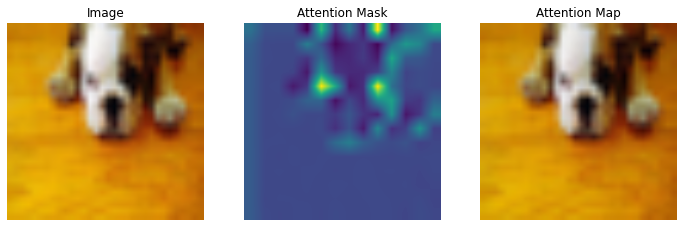

In [73]:
import random

plot_attention_map(data[random.randint(0, 10000)], model, 224, 'cuda')

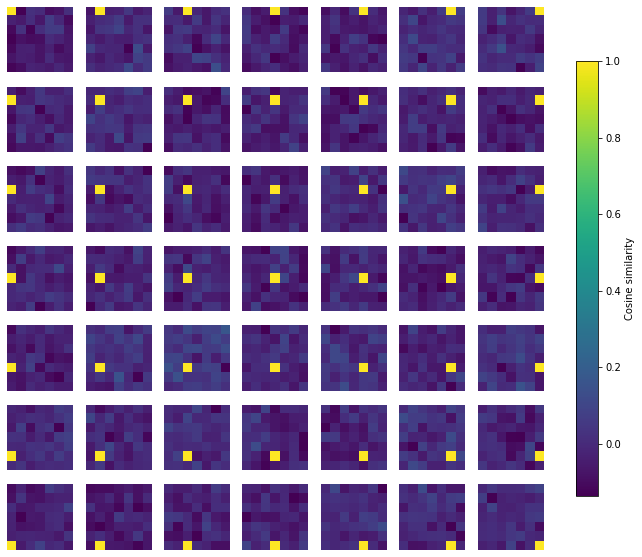

In [7]:
pos_embeddings = model.pos_embedding.squeeze()[1:, :]
plot_pos_emb_similarity(pos_embeddings)

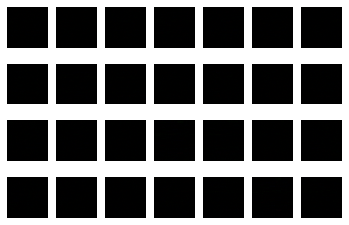

In [8]:
import logging
logger = logging.getLogger()
logger.setLevel(100)

embed_filters = model.linear_projection.weight
plot_rgb_filters(embed_filters, 3)